In [9]:
import numpy as np
from matplotlib import pyplot as plt
import dgl
import espaloma as esp

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!


In [2]:
from dgl.data.utils import load_graphs

Using backend: pytorch


In [3]:
# g, _ = load_graphs("graphs/010te.bin")
g, _ = load_graphs("g_te.bin")
g = g[0]

In [4]:
u = g.nodes['g'].data['u'] * 627.5
u_ref = g.nodes['g'].data['u_ref'] * 627.5

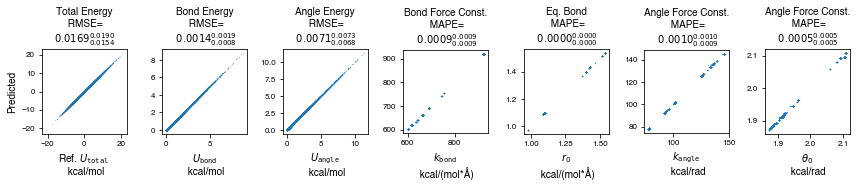

In [10]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams["text.usetex"] = False
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

fig, axs = plt.subplots(1, 7, figsize=(12, 12))

for ax in axs:
        ax.set_aspect('equal')
    
    
S = 0.01

# total energy
x = g.nodes['g'].data['u'] * 627.5
y = g.nodes['g'].data['u_ref'] * 627.5

axs[0].scatter(
    x, y,
    s=S,
)

axs[0].set_title(
    "Total Energy\n RMSE=\n" + 
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


axs[0].set_xlabel("Ref. $U_\mathtt{total}$ \n kcal/mol")
axs[0].set_ylabel("Predicted")

# bond
x = g.nodes['n2'].data['u'] * 627.5
y = g.nodes['n2'].data['u_ref'] * 627.5

axs[1].scatter(
    x, y,
    s=S,
)

axs[1].set_title(
    "Bond Energy\n RMSE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

axs[1].set_xlabel("$U_\mathtt{bond}$ \n kcal/mol")
# axs[1].set_ylabel("$\hat{U}_\mathtt{bond}$ kcal/mol")

# angle
x = g.nodes['n3'].data['u'] * 627.5
y = g.nodes['n3'].data['u_ref'] * 627.5

axs[2].scatter(
    x, y,
    s=S,
)

axs[2].set_xlabel("$U_\mathtt{angle}$ \n kcal/mol")
# axs[2].set_ylabel("$\hat{U}_\mathtt{angle}$ kcal/mol")

axs[2].set_title(
    "Angle Energy\n RMSE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# bond k

x = g.nodes['n2'].data['k'] * 627.5 / (0.529177 ** 2)
y = g.nodes['n2'].data['k_ref'] * 627.5 / (0.529177 ** 2)

axs[3].scatter(
    x, y,
    s=S,
)

axs[3].set_xlabel("$k_\mathtt{bond}$ \n kcal/(mol*Å)")
# axs[3].set_ylabel("$\hat{k}_\mathtt{bond}$ kcal/(mol*Å)")

axs[3].set_title(
    "Bond Force Const.\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

# bond eq

x = g.nodes['n2'].data['eq'] * 0.529177
y = g.nodes['n2'].data['eq_ref'] * 0.529177

axs[4].scatter(
    x, y,
    s=S,
)


axs[4].set_xlabel("$r_0$ \n kcal/(mol*Å)")
# axs[4].set_ylabel("$\hat{r}_0$ kcal/(mol*Å)")

axs[4].set_title(
    "Eq. Bond\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# angle k

x = g.nodes['n3'].data['k'] * 627.5
y = g.nodes['n3'].data['k_ref'] * 627.5

axs[5].scatter(
    x, y,
    s=S,
)

axs[5].set_xlabel("$k_\mathtt{angle}$ \n kcal/rad")
# axs[5].set_ylabel("$\hat{k}_\mathtt{angle}$ kcal/rad")

axs[5].set_title(
    "Angle Force Const.\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

# angle eq

x = g.nodes['n3'].data['eq'] 
y = g.nodes['n3'].data['eq_ref'] 

axs[6].scatter(
    x, y,
    s=S,
)

axs[6].set_xlabel("$θ_0$ \n kcal/rad")
# axs[6].set_ylabel("$\hat{\theta}_0$ kcal/rad")

axs[6].set_title(
    "Angle Force Const.\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

plt.tight_layout()

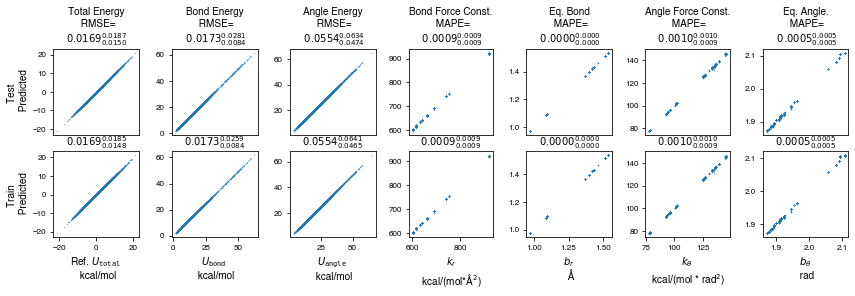

In [13]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams["text.usetex"] = False
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

fig, axs = plt.subplots(2, 7, figsize=(12, 4))

for ax_arr in axs:
    for ax in ax_arr:
        ax.set_aspect('equal')
    
    
S = 0.05


# g, _ = load_graphs("graphs/010te.bin")
g, _ = load_graphs("g_te.bin")
g = g[0]


# total energy
y = g.nodes['g'].data['u'] * 627.5
x = g.nodes['g'].data['u_ref'] * 627.5

axs[0, 0].scatter(
    x, y,
    s=S,
)

axs[0, 0].set_title(
    "Total Energy\n RMSE=\n" + 
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# axs[0, 0].set_xlabel("Ref. $U_\mathtt{total}$ \n kcal/mol")
axs[0, 0].set_ylabel("Test \n Predicted")

# bond
y = g.nodes['g'].data['u_n2'] * 627.5
x = g.nodes['g'].data['u_n2_ref'] * 627.5

axs[0, 1].scatter(
    x, y,
    s=S,
)

axs[0, 1].set_title(
    "Bond Energy\n RMSE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

# axs[0, 1].set_xlabel("$U_\mathtt{bond}$ \n kcal/mol")
# axs[1].set_ylabel("$\hat{U}_\mathtt{bond}$ kcal/mol")

# angle
y = g.nodes['g'].data['u_n3'] * 627.5
x = g.nodes['g'].data['u_n3_ref'] * 627.5

axs[0, 2].scatter(
    x, y,
    s=S,
)

# axs[0, 2].set_xlabel("$U_\mathtt{angle}$ \n kcal/mol")
# axs[2].set_ylabel("$\hat{U}_\mathtt{angle}$ kcal/mol")

axs[0, 2].set_title(
    "Angle Energy\n RMSE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# bond k

y = g.nodes['n2'].data['k'] * 627.5 / (0.529177 ** 2)
x = g.nodes['n2'].data['k_ref'] * 627.5 / (0.529177 ** 2)

axs[0, 3].scatter(
    x, y,
    s=S,
)

# axs[0, 3].set_xlabel("$k_\mathtt{bond}$ \n kcal/(mol*Å)")
# axs[3].set_ylabel("$\hat{k}_\mathtt{bond}$ kcal/(mol*Å)")

axs[0, 3].set_title(
    "Bond Force Const.\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

# bond eq

y = g.nodes['n2'].data['eq'] * 0.529177
x = g.nodes['n2'].data['eq_ref'] * 0.529177

axs[0, 4].scatter(
    x, y,
    s=S,
)


# axs[0, 4].set_xlabel("$r_0$ \n kcal/(mol*Å)")
# axs[4].set_ylabel("$\hat{r}_0$ kcal/(mol*Å)")

axs[0, 4].set_title(
    "Eq. Bond\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# angle k

y = g.nodes['n3'].data['k'] * 627.5
x = g.nodes['n3'].data['k_ref'] * 627.5

axs[0, 5].scatter(
    x, y,
    s=S,
)

# axs[0, 5].set_xlabel("$k_\mathtt{angle}$ \n kcal/rad")
# axs[5].set_ylabel("$\hat{k}_\mathtt{angle}$ kcal/rad")

axs[0, 5].set_title(
    "Angle Force Const.\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

# angle eq

y = g.nodes['n3'].data['eq'] 
x = g.nodes['n3'].data['eq_ref'] 

axs[0, 6].scatter(
    x, y,
    s=S,
)

# axs[0, 6].set_xlabel("$θ_0$ \n kcal/rad")
# axs[6].set_ylabel("$\hat{\theta}_0$ kcal/rad")

axs[0, 6].set_title(
    "Eq. Angle.\n MAPE=\n %s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# g, _ = load_graphs("graphs/010tr.bin")
g, _ = load_graphs("g_te.bin")
g = g[0]


# total energy
y = g.nodes['g'].data['u'] * 627.5
x = g.nodes['g'].data['u_ref'] * 627.5

axs[1, 0].scatter(
    x, y,
    s=S,
)

axs[1, 0].set_title(
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


axs[1, 0].set_xlabel("Ref. $U_\mathtt{total}$ \n kcal/mol")
axs[1, 0].set_ylabel("Train \n Predicted")

# bond
y = g.nodes['g'].data['u_n2'] * 627.5
x = g.nodes['g'].data['u_n2_ref'] * 627.5

axs[1, 1].scatter(
    x, y,
    s=S,
)

axs[1, 1].set_title(
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

axs[1, 1].set_xlabel("$U_\mathtt{bond}$ \n kcal/mol")
# axs[1].set_ylabel("$\hat{U}_\mathtt{bond}$ kcal/mol")

# angle
y = g.nodes['g'].data['u_n3'] * 627.5
x = g.nodes['g'].data['u_n3_ref'] * 627.5

axs[1, 2].scatter(
    x, y,
    s=S,
)

axs[1, 2].set_xlabel("$U_\mathtt{angle}$ \n kcal/mol")
# axs[2].set_ylabel("$\hat{U}_\mathtt{angle}$ kcal/mol")

axs[1, 2].set_title(
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# bond k

y = g.nodes['n2'].data['k'] * 627.5 / (0.529177 ** 2)
x = g.nodes['n2'].data['k_ref'] * 627.5 / (0.529177 ** 2)

axs[1, 3].scatter(
    x, y,
    s=S,
)

axs[1, 3].set_xlabel("$k_r$ \n kcal/(mol*Å$^2$) ")
# axs[3].set_ylabel("$\hat{k}_\mathtt{bond}$ kcal/(mol*Å)")

axs[1, 3].set_title(
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

# bond eq

y = g.nodes['n2'].data['eq'] * 0.529177
x = g.nodes['n2'].data['eq_ref'] * 0.529177

axs[1, 4].scatter(
    x, y,
    s=S,
)


axs[1, 4].set_xlabel("$b_r$ \n Å")
# axs[4].set_ylabel("$\hat{r}_0$ kcal/(mol*Å)")

axs[1, 4].set_title(
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)


# angle k

y = g.nodes['n3'].data['k'] * 627.5
x = g.nodes['n3'].data['k_ref'] * 627.5

axs[1, 5].scatter(
    x, y,
    s=S,
)

axs[1, 5].set_xlabel("$k_θ$ \n kcal/(mol * rad$^2$)")
# axs[5].set_ylabel("$\hat{k}_\mathtt{angle}$ kcal/rad")

axs[1, 5].set_title(
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

# angle eq

y = g.nodes['n3'].data['eq'] 
x = g.nodes['n3'].data['eq_ref'] 

axs[1, 6].scatter(
    x, y,
    s=S,
)

axs[1, 6].set_xlabel("$b_θ$ \n rad")
# axs[6].set_ylabel("$\hat{\theta}_0$ kcal/rad")

axs[1, 6].set_title(
    "%s" % esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
        )
    ),
    fontdict={'fontsize': 10}
)

for ax in axs[0]:
    ax.set_xticks([])

plt.tight_layout()

plt.savefig("mm_scatter.png", dpi=300)

In [7]:
def latex_table(g, name="010"):
    import pandas as pd
    df = pd.DataFrame(columns=[
        "Name",
        "$U_\mathtt{total}$",
        "$U_\mathtt{bond}$",
        "$U_\mathtt{angle}$",
        "$U_\mathtt{torsion}$"
        
        "$U_\mathtt{total, centered}$",
        "$U_\mathtt{bond, centered}$",
        "$U_\mathtt{angle, centered}$",
        "$U_\mathtt{torsion, centered}$"
        
        "$k_r$",
        "$b_r$",
        "$k_\theta$",
        "$b_\theta$",
    ])
    
    def _mape(x, y):
        return esp.metrics.latex_format_ci(
            *esp.metrics.bootstrap(esp.metrics.mape)(
            x, y
            )
        )
        
            
            
    def _rmse(x, y):
        return esp.metrics.latex_format_ci(
        *esp.metrics.bootstrap(esp.metrics.rmse)(
            x, y
            )
        )
    
    def _center(x):
        return x - x.mean(dim=-1, keepdims=True)
    
    u = g.nodes['g'].data['u'] * 627.5
    u2 = g.nodes['g'].data['u_n2'] * 627.5
    u3 = g.nodes['g'].data['u_n3'] * 627.5
    
    u_ref = g.nodes['g'].data['u_ref'] * 627.5
    u2_ref = g.nodes['g'].data['u_n2_ref'] * 627.5
    u3_ref = g.nodes['g'].data['u_n3_ref'] * 627.5
    
    rmse_total = _rmse(u, u_ref)
    rmse_2 = _rmse(u2, u2_ref)
    rmse_3 = _rmse(u3, u3_ref)
    
    rmse_total_centered = _rmse(_center(u), _center(u_ref))
    rmse_2_centered = _rmse(_center(u2), _center(u2_ref))
    rmse_3_centered = _rmse(_center(u3), _center(u3_ref))
    
    k2 = g.nodes['n2'].data['k']
    b2 = g.nodes['n2'].data['eq']
    k2_ref = g.nodes['n2'].data['k_ref']
    b2_ref = g.nodes['n2'].data['eq_ref']
    
    k3 = g.nodes['n3'].data['k']
    b3 = g.nodes['n3'].data['eq']
    k3_ref = g.nodes['n3'].data['k_ref']
    b3_ref = g.nodes['n3'].data['eq_ref']
    
    mape_k2 = _mape(k2, k2_ref)
    mape_b2 = _mape(b2, b2_ref)
    mape_k3 = _mape(k3, k3_ref)
    mape_b3 = _mape(b3, b3_ref)
    
    if 'u_n4' in g.nodes['g'].data:
        u4 = g.nodes['g'].data['u_n4']
        u4_ref = g.nodes['g'].data['u_n4_ref']
        rmse_4 = _rmse(u4, u4_ref)
        rmse_4_centered = _rmse(_center(u4), _center(u4_ref))
    
    else:
        rmse_4 = " "
        rmse_4_centered = " "
    
    df = df.append(
        {
            "$U_\mathtt{total}$": rmse_total,
            "$U_\mathtt{bond}$": rmse_2,
            "$U_\mathtt{angle}$": rmse_3, 
            "$U_\mathtt{torsion}$": rmse_4, 

            "$U_\mathtt{total, centered}$": rmse_total_centered,
            "$U_\mathtt{bond, centered}$": rmse_2_centered,
            "$U_\mathtt{angle, centered}$": rmse_3_centered,
            "$U_\mathtt{torsion, centered}$": rmse_4_centered,

            "$k_r$": mape_k2,
            "$b_r$": mape_b2,
            "$k_\theta$": mape_k3,
            "$b_\theta$": mape_b3,
        },
        ignore_index=True
    )
    

    return df

In [8]:
df = latex_table(g)
print(df.to_latex(escape=False))

# print(df.to_latex().replace("\\", "").replace("textbackslash ", "\\"))

NameError: name 'esp' is not defined